## Multiple linear regression modelling

To address the business request, you will conduct a multiple linear regression analysis to estimate sales from a combination of independent variables. This will include:

1.Exploring and cleaning data
2.Using plots and descriptive statistics to select the independent variables
3.Creating a fitting multiple linear regression model
4.Checking model assumptions
5.Interpreting model outputs and communicating the results to non-technical stakeholders

In [1]:
# Import libraries and modules.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
#import data
data = pd.read_csv('marketing_sales_data.csv')

In [3]:
# Display the first five rows.
data.head(5)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


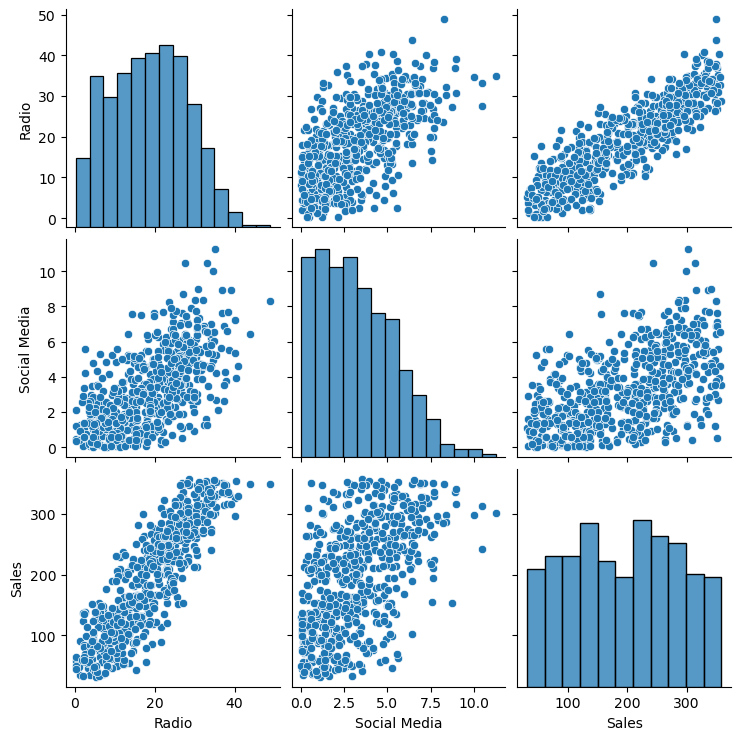

In [4]:
# Create a pairplot of the data.
#Create a pairplot to visualize the relationship between the continous variables in data.

sns.pairplot(data)

In [6]:
# Calculate the mean sales for each TV category. 
data.groupby('TV')['Sales'].mean()


TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

In [7]:
# Calculate the mean sales for each Influencer category. 
data.groupby('Influencer')['Sales'].mean()

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64

### Removing missing data

In [8]:
# Drop rows that contain missing data and update the DataFrame.
data=data.dropna(axis=0)

In [10]:
# Rename all columns in data that contain a space. 
data=data.rename(columns={'Social Media':'Social_Media'})

In [11]:
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


### Fit a multiple linear regression model that predicts sales

In [12]:
# Define the OLS formula.

ols_formula= 'Sales~ C(TV) + Radio'

In [13]:
# Create an OLS model.

OLS=ols(formula=ols_formula ,data=data)

In [14]:
# Fit the model.

model=OLS.fit()

In [15]:
# Save the results summary.

model_results=model.summary()

In [16]:
# Display the model results.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          1.61e-287
Time:                        11:34:00   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Check model assumptions,Linearity

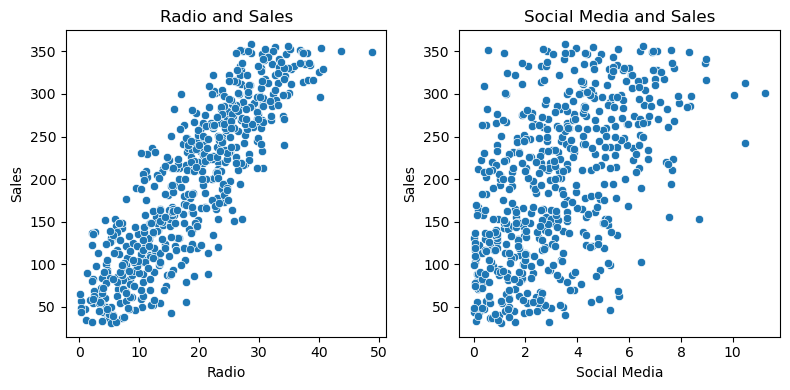

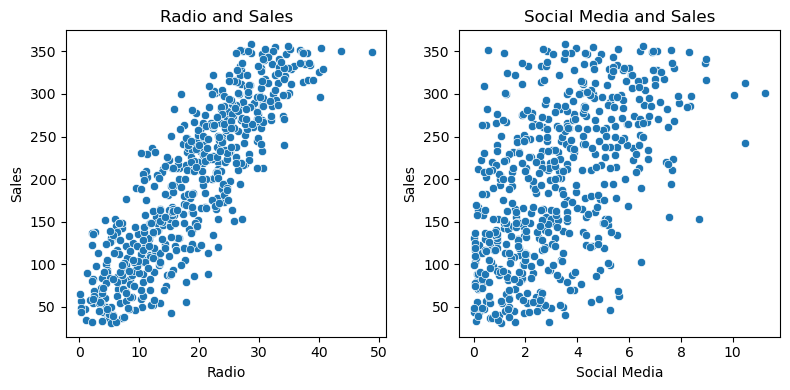

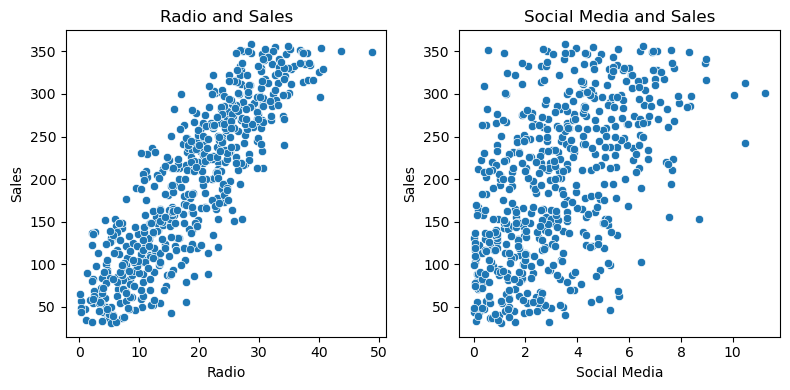

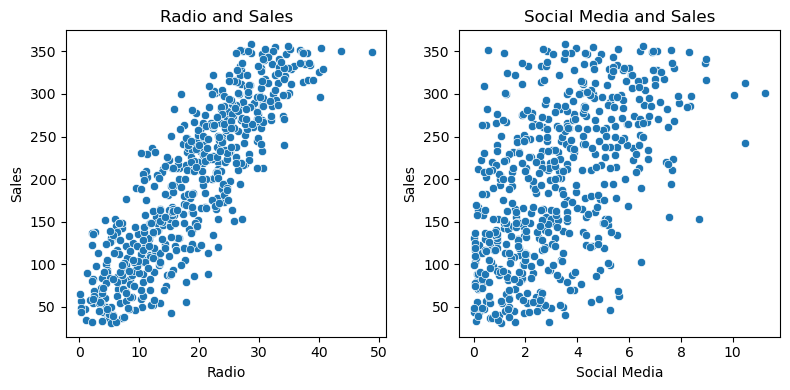

In [20]:
#Create a scatterplot for each independent variable and the dependent variable.

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a scatterplot between Radio and Sales.
sns.scatterplot(x = data['Radio'], y = data['Sales'],ax=axes[0])

# Set the title of the first plot.
axes[0].set_title("Radio and Sales")

# Create a scatterplot between Social Media and Sales.
sns.scatterplot(x = data['Social_Media'], y = data['Sales'],ax=axes[1])

# Set the title of the second plot.
axes[1].set_title("Social Media and Sales")

# Set the xlabel of the second plot.
axes[1].set_xlabel("Social Media")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
plt.show()

### Independence

The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

### Normality


Create the following plots to check the normality assumption:

Plot 1: Histogram of the residuals
Plot 2: Q-Q plot of the residuals

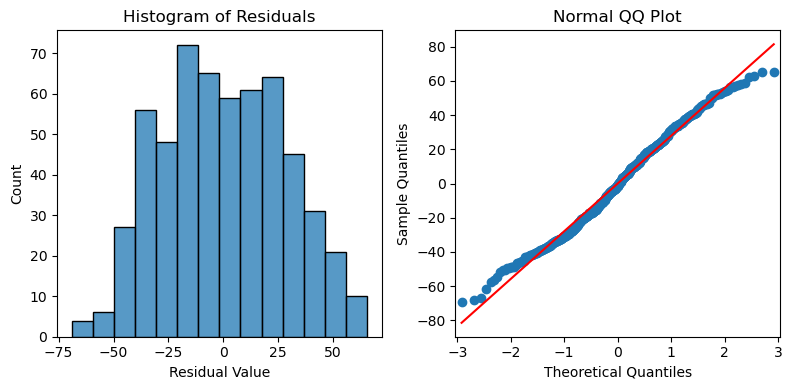

In [21]:
# Calculate the residuals.


residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals. 



sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a Q-Q plot of the residuals.



sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the Q-Q plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()


### Constant variance

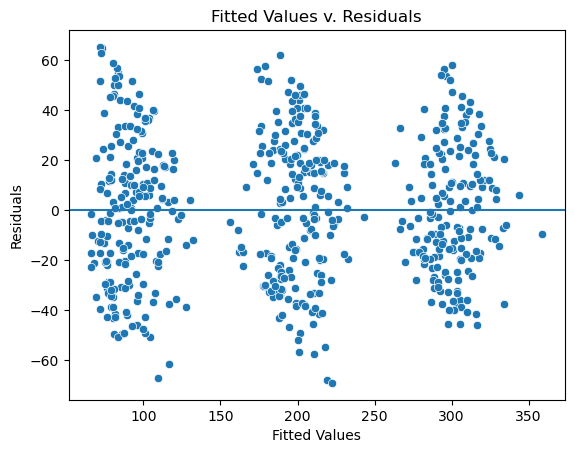

In [22]:
# Create a scatterplot with the fitted values from the model and the residuals.

fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)

# Set the x axis label.
fig.set_xlabel("Fitted Values")

# Set the y axis label.
fig.set_ylabel("Residuals")

# Set the title.
fig.set_title("Fitted Values v. Residuals")

# Add a line at y = 0 to visualize the variance of residuals above and below 0.

### YOUR CODE HERE ### 

fig.axhline(0)

# Show the plot.
plt.show()


### No multicollinearity

The no multicollinearity assumption states that no two independent variables ( 𝑋𝑖
  and  𝑋𝑗
 ) can be highly correlated with each other.

Two common ways to check for multicollinearity are to:

Create scatterplots to show the relationship between pairs of independent variables
Use the variance inflation factor to detect multicollinearity
Use one of these two methods to check your model's no multicollinearity assumptio

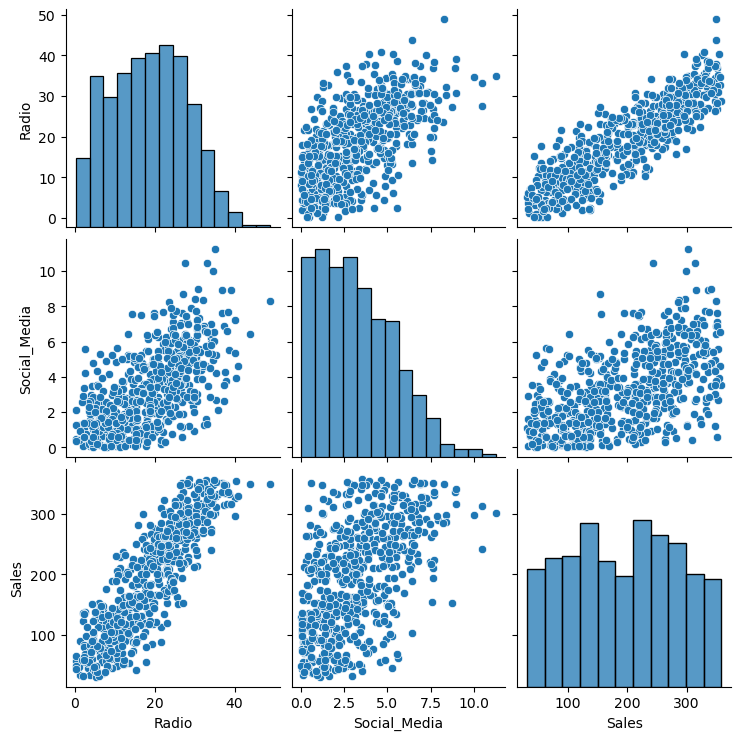

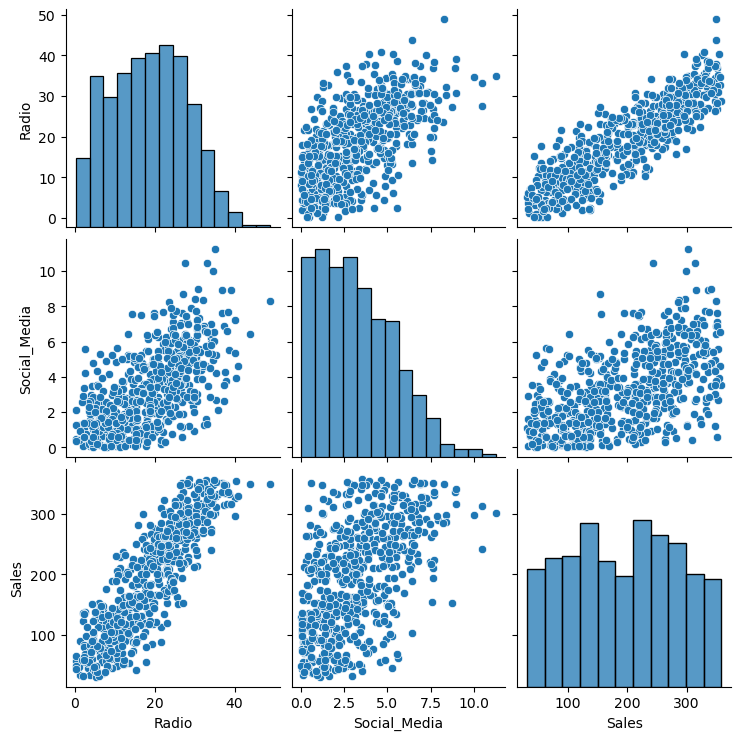

In [25]:
# Create a pairplot of the data.

sns.pairplot(data)
plt.show()

In [24]:
# Calculate the variance inflation factor (optional).

### YOUR CODE HERE ### 

# Import variance_inflation_factor from statsmodels.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a subset of the data with the continous independent variables. 
X = data[['Radio','Social_Media']]

# Calculate the variance inflation factor for each variable.
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Create a DataFrame with the VIF results for the column names in X.
df_vif = pd.DataFrame(vif, index=X.columns, columns = ['VIF'])

# Display the VIF results.
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


### Display the OLS regression results

In [26]:
# Display the model results summary.

model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1782.
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          1.61e-287
Time:                        11:34:00   Log-Likelihood:                -2701.4
No. Observations:                 569   AIC:                             5411.
Df Residuals:                     565   BIC:                             5428.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         217.6367      6.577     33.089      0.000     204.718     230.556
C(TV)[T.Low]     -152.0897      5.160    -29.474      0.000    -162.225    -141.954
C(TV)[T.Medium]   -73.4835      3.587    -20.484      0.000     -80.530     -66.437
Radio               2.8864      0.217     13.306      0.000       2.460       3.312
==============================================================================
Omnibus:                       35.219   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.863
Skew:                           0.087   Prob(JB):                     0.000976
Kurtosis:                       2.255   Cond. No.                         155.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Using TV and Radio as the independent variables results in a multiple linear regression model with  𝑅2=0.904
 . In other words, the model explains  90.4%
  of the variation in Sales. This makes the model an excellent predictor of Sales.

When TV and Radio are used to predict Sales, the model coefficients are:

𝛽0=218.5261
 
𝛽𝑇𝑉𝐿𝑜𝑤=−154.2971
 
𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚=−75.3120
 
𝛽𝑅𝑎𝑑𝑖𝑜=2.9669

The relationship between Sales and the independent variables as a linear equation?

Sales=𝛽0+𝛽1∗𝑋1+𝛽2∗𝑋2+𝛽3∗𝑋3
 
Sales=𝛽0+𝛽𝑇𝑉𝐿𝑜𝑤∗𝑋𝑇𝑉𝐿𝑜𝑤+𝛽𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚∗𝑋𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚+𝛽𝑅𝑎𝑑𝑖𝑜∗𝑋𝑅𝑎𝑑𝑖𝑜
 
Sales=218.5261−154.2971∗𝑋𝑇𝑉𝐿𝑜𝑤−75.3120∗𝑋𝑇𝑉𝑀𝑒𝑑𝑖𝑢𝑚+2.9669∗𝑋𝑅𝑎𝑑𝑖𝑜

The default TV category for the model is High since there are coefficients for the other two TV categories, Medium and Low. Because the coefficients for the Medium and Low TV categories are negative, that means the average of sales is lower for Medium or Low TV categories compared to the High TV category when Radio is at the same level.

For example, the model predicts that a Low TV promotion is 154.2971 lower on average compared to a high TV promotion given the same Radio promotion.

The coefficient for Radio is positive, confirming the positive linear relationship shown earlier during the exploratory data analysis.

The p-value for all coefficients is  0.000
 , meaning all coefficients are statistically significant at  𝑝=0.05
 . The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders.

For example, there is a  95%
  chance that the interval  [−163.979,−144.616]
  contains the true parameter of the slope of  𝛽𝑇𝑉𝐿𝑜𝑤
 , which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.